In [14]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available()else 'cpu')
from IPython import display
from PIL import Image
import numpy as np

/tmp/ipykernel_2614/3498441827.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


(960, 960, 3)


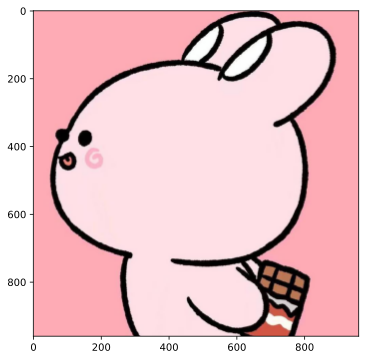

In [15]:
display.set_matplotlib_formats('svg')
plt.rcParams['figure.figsize']=(6,6)
image = Image.open('/home/Image_add/cat.jpg')
plt.imshow(image)
img  = np.array(image)
print(img.shape)

In [19]:
def show_images(imgs,num_rows,num_cols,scale=2):
    figsize = (num_cols*scale,num_rows*scale)
    _,axes = plt.subplots(num_rows,num_cols,figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i*num_cols+j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [20]:
def apply(img,aug,num_rows=2,num_cols=4,scale=1.5):
    Y = [aug(img) for _ in range(num_rows*num_cols)]
    show_images(Y,num_rows,num_cols,scale)

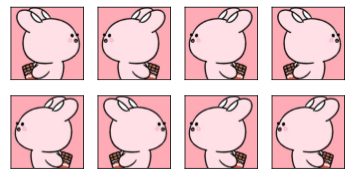

In [21]:
apply(image,torchvision.transforms.RandomHorizontalFlip())

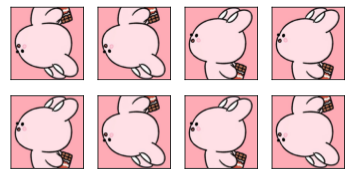

In [22]:
apply(image,torchvision.transforms.RandomVerticalFlip())

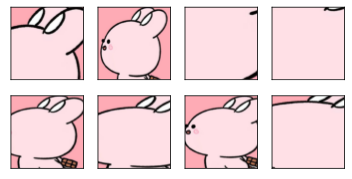

In [23]:
shape_aug = torchvision.transforms.RandomResizedCrop(200,scale=(0.1,1),ratio=(0.5,2))
apply(image,shape_aug)

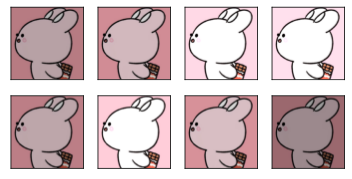

In [24]:
apply(image,torchvision.transforms.ColorJitter(brightness=0.5))

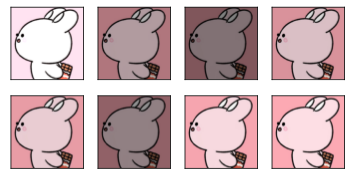

In [26]:
apply(image,torchvision.transforms.ColorJitter(brightness=0.5))


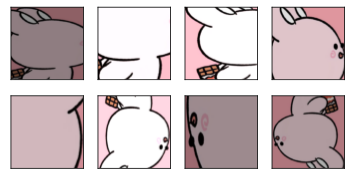

In [27]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    shape_aug,
    torchvision.transforms.ColorJitter(brightness=0.5)
    ]
)
apply(image,augs)